# 01 - ECON 325: Central Tendency

COMET Team <br> *Colby Chambers, Oliver (Junye) Xu, Anneke Dresselhuis,
Jonathan Graves*  
12/01/2023

## Outline

### Prerequisites

-   Introduction to Jupyter
-   Introduction to R
-   Introduction to Visualization

### Outcomes

After completing this notebook, you will be able to:

-   Define the following terms: mean, median, percentiles and mode.
-   Calculate mean, median and mode in R.
-   Create boxplots to visualize ranges of data.
-   Interpret and work with these statistics under various applications.

### References

-   [Finding the Statistical Mode in
    R](https://stackoverflow.com/questions/2547402/how-to-find-the-statistical-mode)

# Introduction

In this notebook, we will introduce the idea of **central tendency**. In
statistics, central tendency refers to the idea of how different
interpretations of the term “middle” can be used to describe a
probability distribution or dataset. In this notebook, we’ll think about
central tendency in terms of numerical values which describe a given
subset of dataset. This concept is important because we often deal with
incredibly large datasets that are too big to describe in their
entirety. In this light, it’s crucial to have summary statistics that we
can use to describe the general behaviour of variables. Before we
continue, let’s import our familiar Canadian census dataset using the
tools we’ve learned already.

In [ ]:
# install.packages("tidyverse") only run these two commands if you have not already installed these packages
# install.packages("haven")
# install.packages("ggplot2")

library(tidyverse)
library(haven)
library(ggplot2)

source("testing_central_tendency.r") # self-testing materials

census_data <- read_dta("../datasets/01_census2016.dta")

# Part 1: Key Concepts

## Mean

The first, and most commonly referenced measure of central tendency is
the **sample mean** (also referred to as the **arithmetic mean**). The
mean of a variable is the average value of that variable, which can be
found by summing together all values that a variable takes on in a set
of observations and dividing by the total number of observations used.
This is an intuitive measure of central tendency that many of us think
of when we are trying to describe data. The formula for the sample mean
is below.

$$
\overline{x} = \frac{1}{n}\sum_{i=0}^{n} x_i =  \frac{Sum~of~All~Data~Points}{Total~Number~of~Data~Points}
$$

For large datasets, using the formula above to find the mean by hand is
impossibly incovenient. Luckily, we can quickly calculate the mean of a
variable in R as below.

In [ ]:
# find the mean of market income (mrkinc)
mean(census_data$mrkinc)

Interesting! We see that the above code outputs `NA`. Why is this
happening? Essentially, any time we try to perform operations to find
statistics of central tendency for a variable that includes `NA` values,
R will produce `NA` as the output. This is the case even if the data set
only includes one observation recorded as `NA` for that variable. To
account for this, we can simply filter our data set to remove these
missing observations. We must do this when calculating *any* of the
statistics introduced in this section, not just the mean. We do this
below.

In [ ]:
# remove missing values (NA values) in order to find the mean of mrkinc
census_data <- filter(census_data, !is.na(census_data$mrkinc))

mean(census_data$mrkinc)

Looking at the code above, the filter function takes in a dataframe and
an argument. It then keeps all observations which return a value of
`TRUE` for that argument. Here, we had to specify that `is.na()` be
`FALSE` (i.e. `!=TRUE`) to keep observations for which there was no `NA`
recorded on the `mrkinc` variable. This now gives us an actual answer
for our mean: the average market income is about 59000.

> **Question**: Notice that the mean only makes sense when we can add
> and divide the values of a variable. What kind of variable type is
> this appropriate for?

## Median

Another common measure of central tendency is the **median**. The median
is the value which exactly splits the observations for a variable in our
data set in half when ordered in increasing (or decreasing) order. For
instance, if we had observations for `mrkinc` of 60000, 45000, and
72000, our median value for `mrkinc` would be 60000 because there is
exactly one observation above (70000) and one observation below (45000)
this value. To find the median of a variable, we order all of our
observations in ascending (or descending) order, then find the value in
the middle of this ordered list. This works great when we have an odd
number of numbers to list (i.e. 9 observations). However, for a list
which is of even length (i.e. has 10 observations), we must take the
middle *two* observations and take their arithmetic mean (sound
familiar!). A formula for finding the median in each of these two cases
is below.

Arrange data in ascending (or descending) order. Let $n$ be the number
of data points. If $n$ is odd, then:

$$
Median = \frac{n+1}{2}th ~~ {data~point}
$$

Otherwise,

$$
Median = \frac{1}{2} * [\frac{n}{2}th ~~ {data~point} + (\frac{n}{2} + 1)th ~~ {data~point}]
$$

For large datasets, ordering all the values is basically impossible. We
instead invoke the `median()` function to help us find our median
quickly in R.

In [ ]:
# find the median of mrkinc
median(census_data$mrkinc)

As we can see, the mean and median of market income in this census are
not the same. This is quite common, and we will return to this idea of
the mean and median being different a bit later on.

> **Question**: What kind of variable is the median appropriate for?
> Why?

## Percentiles

As we learned, the median splits our dataset in half. In this way, 50%
of our observations lie below the median, while the other 50% lie above.
This brings us to **percentiles**: a percentile is a value on a scale of
0-100 (cent- coming from the Latin “centum”, meaning “hundred”) that
indicates the percentage of a distribution that is at or below that
value. Put another way, the $n$-th percentile of a variable is the
number at which $n$ percent of the recorded values lie to the left when
all observations have been put in ascending order.

The median is necessarily the 50th percentile of any given variable.
This is because 50% of the recorded observations for that variable lie
below the median. However, we can describe data with many more
percentiles than just the 50th percentile. For example, we commonly
refer to **quantiles** when describing data. Quantiles are equally
divided sections of a distribution of values which together capture the
full distribution of these values. They are thus a collection of
percentiles which together must add up to 100. Below are some common
examples of quantiles. - Quartiles: the 0th percentile, 25th percentile,
50th percentile, 75th percentile, and 100th percentile - Quintiles: the
0th percentile, 20th percentile, 40th percentile, 60th percentile, 80th
percentile, and 100th percentile

For instance, we may want to know what the 25th percentile of market
income is in this dataset. That is, what is the value of market income
for which 25% of the recorded observations for market income are less
than this value. We can use the `quantile()` function in R to find this.

In [ ]:
# find the 25th percentile of market income
quantile(census_data$mrkinc)

From our output, we can see that our 25th percentile is 22,000. That is,
25% of the people in this dataset have a recorded market income less
than 22,000. Further, we can see that this general `quantile()` function
outputs all of the quartiles of the `mrkinc` variable (including the 0th
percentile, which we can interpret as the minimum value, and the 100th
percentile, which we can interpret as the maximum value). This is the
default format of the `quantile()` function. If we want to find
*specific* percentiles, we can specify an additional argument to the
function. For example, we may want to find the 33rd percentile of market
income.

In [ ]:
# find the 33rd percentile of market income
quantile(census_data$mrkinc, 0.33)

We may even want to find a series of percentiles. We can pass a vector
to the `quantile()` function to achieve this.

In [ ]:
# find the 40th and 80th percentiles of market income
quantile(census_data$mrkinc, c(0.4, 0.8))

The picture below helps to visualize percentiles more clearly. It
includes quartiles and a series of other details, including the
**interquartile range**, which is the difference between the 75th and
25th percentiles.

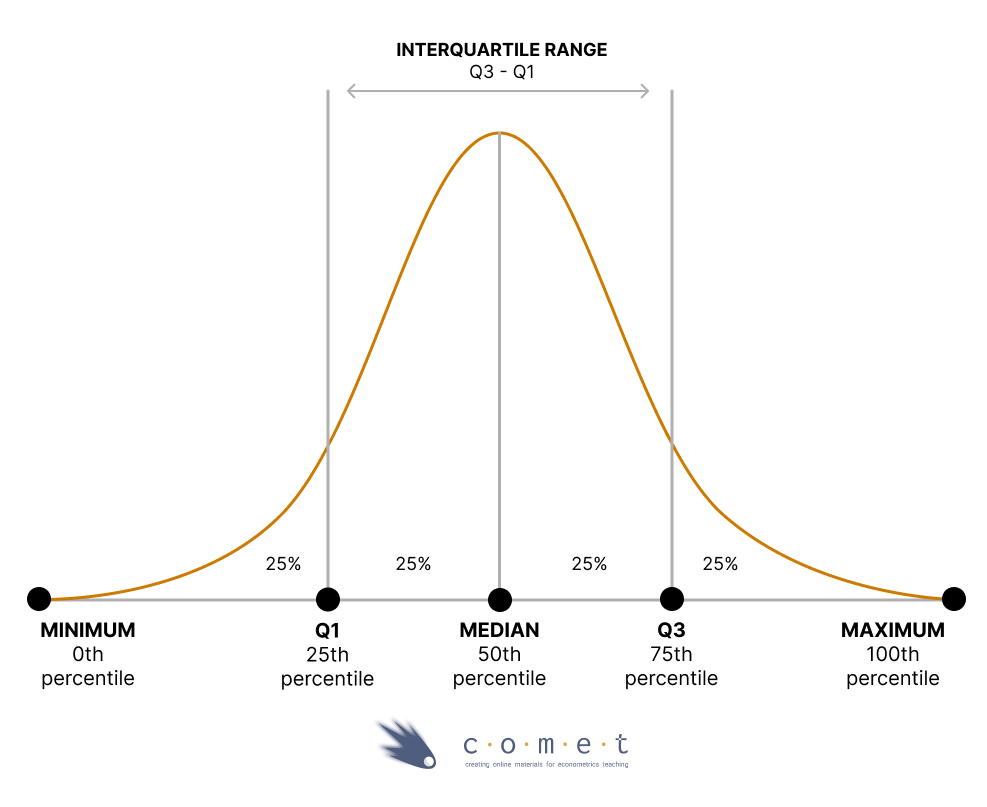

One incredibly helpful tool is Tukey’s **five number summary**; it
includes the minimum, 25th percentile, median, 75th percentile, and
maximum. To find this, we can call the `fivenum()` function, which takes
in a set of data and returns the five statistics listed above. Try it
below.

> **Question**: Does the output look familiar? How?

In [ ]:
fivenum(census_data$mrkinc)

## Boxplots

Sometimes, we might want to visualize this summary in a diagram. We can
use a visualization called a **boxplot** to graphically represent the
central tendency, spread and skewness of numerical data. There are a
variety of different variations of the boxplot, but in R the default to
create a diagram where:

-   The box represents the interquartile ranges; i.e. the 25th and 75th
    percentile.
-   The bold line inside the box represents the median
-   The lines outside the box (called the “whiskers”) are the either the
    min and max, or 1.5 times the interquartile. Values which exceed
    this distance are drawn as points, and are described as “outliers.
    -   You can change this behaviour by setting `range = 0`; in this
        case, the whiskers extend to the min and max, and the boxplot
        depicts the five number summary. The default is `range = 1.5`.

To make this plot, we simply invoke the `boxplot()` function. This
outputs a box which captures the interquartile range, with the median
value marked as a bold line inside the box. In this way, the boxplot
represents the quartiles of a dataset and how the data is distributed
more generally.

In [ ]:
boxplot(census_data$mrkinc)

## Mode

The last common measure of central tendency is the **mode**. The mode is
the most common value a variable takes on in a dataset. For example, if
a variable takes on values of 1, 6, 2, 3, 2, and 4, the mode of this
variable is 2. If two different values are *equally* represented as the
most common value, there will be multiple modes. In this way, it is
possible that the mode can be described as *more* than one value.

Let’s try the `mode()` function in R to see if we can find this
statistic in our `mrkinc` variable.

In [ ]:
# find the mode of mrkinc
mode(census_data$mrkinc)

We see that `mode()` doesn’t return a value for the mode, but instead
returns the data type of the mode itself, which in this case is numeric.
Unfortunately, R does not have a simple mode function like it does for
the previous statistics. We must instead resort to either defining our
own functions to find the mode, or even installing and importing new
packages to help us. One possible method of finding the mode is seen
below.

In [ ]:
# create a function which finds the mode
findmode <- function(x) {
    ux <- unique(x)
    ux[which.max(tabulate(match(x, ux)))]
    }

# call this function to find the mode of mrkinc
findmode(census_data$mrkinc)

## Summary

The **mean** is a stand-by measure of central tendency which tells us
our average value for a variable. The **median** tells us what value
splits our dataset in half for a given variable, while **percentiles**
allow us to hone in on dissecting the distribution of values for a
variable in our dataset in more detail.

It is perhaps unsurprising that R does not have an easy built-in
function for finding the **mode**, given that the mode is generally much
less useful than our other statistics. One way that the mode can be a
deceiving statistic is in instances of **top coding**. This is where any
values above a given threshold are reported as simply at that threshold.

> For example, suppose the survey used to collect our `mrkinc` variable
> offered a range of incomes for participants to select - but only up to
> 110,000 - after which, anyone with a market income higher than 110,000
> was described as having an income of 110,000. This could make
> \$110,000 by far the most commonly reported value for `mrkinc`. In
> this case, these wealthy people in the population would skew the mode,
> rendering this measure of central tendency to be misleading since it
> prompts us to interpret the survey threshold as a very common value of
> `mrkinc` in the data. If you take ECON 326, you will see how top
> coding is dealt with, including by redefining these observations or
> dropping them altogether.

For these reasons, we will stick to the mean, median and percentiles as
we move forward with applications and further elaboration. While it is
important to understand what the mode is, it is not particularly
important for our general analysis of central tendency.

### Exercise 1

Find the mean and median values of `wages`, to 2 decimal places if
necessary. Be sure to remove missing observations first.

In [ ]:
# your code here
census_data <- filter(census_data, !is.na(census_data$wages))

mean(census_data$wages)
median(census_data$wages)

answer_1 <- # your answer for the mean here
answer_2 <- # your answer for the median here

test_1()
test_2()

### Exercise 2

Using what we’ve learned so far, graph the distribution of values of the
`wages` variable. Use this graph to help you answer the following
question: *Which of the following measures of central tendency is most
apt to report for the central tendency of this variable?*

-   A: mean
-   B: median
-   C: mode

In [ ]:
answer_3 <- "X" # replace X with your answer of A, B, or C here

test_3()

<span style="color: red;">Explain your reasoning here:</span>

### Exercise 3

What is the interquartile range of the `wages` variable?

In [ ]:
# your code here
quantile(census_data$wages)
fivenum(census_data$wages)

answer_4 <- # your answer here

test_4()

# Part 2: Applications and Further Points

Now that we have a basic understanding of the main measures of central
tendency, let’s look at their practicalities, both from a data analysis
and R standpoint.

## Distributions

As was alluded to earlier, the mean and median are usually not the same
value. A clear case where they are the same, however, is when our data
follows a perfectly symmetric distribution. This means that the
probability of seeing any one value for a variable decreases in a near
identical fashion outward from the 50th percentile (the median). As a
result, the average value of the dataset is equal to this median value,
meaning that the mean and median are the same. One common example of
this is the standard normal distribution, a classic symmetric
distribution. We will delve further into different types of
distributions in the upcoming Variation notebook. For now, you can run
the code cell below to see an example of a standard normal distribution
that we have randomly created using functions in R.

In [ ]:
# Don't worry about the specifics of this cell, just run the code.
set.seed(124)

x <- seq(0, 4, 0.1)

plot(x, dnorm(x, 2, 0.5), type = "l", xlab="", ylab="")

# This does not plot standard normal distribution

The above distribution is normally distributed and symmetric. We can see
that the probability of seeing an observation with a specific value is
largest at 2. Since the probability of seeing observations above and
below it falls outward in a completely symmetric fashion, we should
expect 50% of our observations to be above and below this point. We
should also expect it to then be the average value. Thus, 2 is both the
mean and median of the data. ***However, in the real world, many
variables do not follow such a nicely symmetric distribution.*** Let’s
look at our market income variable for an example.

In [ ]:
# plot the histogram of mrkinc
# hist(census_data$mrkinc, breaks=100, freq=TRUE, col="purple", xlab="Market Income", ylab="Number of Observations", main="")
ggplot(census_data, aes(x=mrkinc)) + geom_histogram(bins=100)  + xlab("Market Income") + ylab("Number of Observations")

This is a **histogram**. It shows us the number of observations with
values in different market income groupings. From the output above, we
can see that the data here for market income does not follow a nicely
symmetric pattern. Instead, it appears that there are many more
observations toward the lower end of market income (taller bars for each
grouping), and then many much smaller groups extending far outward to
the right end of high market incomes.

## Skewness

The graph above is an example of a **right-skewed distribution**. A
right-skewed distribution is an asymmetric distribution which has a long
right tail for its histogram. Typically, a right-skewed distribution has
a mean larger than its median. We can understand why this is the case by
looking at the histogram above. There are many observations for small
levels of market income (exemplified by the tall bar groupings on the
left-hand side of the diagram). This means that many people have low
market incomes. As a result, when moving leftward from small to large
values of `mrkinc`, the median appears quite quickly, representing the
50th percentile being at quite a low level of market income. The mean
will be much larger, as it is an averaging of `mrkinc` values and is
such is being skewed upward by the few incredibly values. This aligns
with the calculations for the mean and median we did earlier, wherein
the mean was about \$16,000 more than the median.

Unfortunately, we do not have any variables in this dataset which
exhibit a **left-skewed distribution**, an asymmetric distribution which
has a long left tail for its histogram. However, you can imagine exactly
the opposite logic applying in this case. A long tail on the left-hand
side of the histogram signifies many observations with high values
recorded for a given variable. Thus, in this case, the median is much
higher than the mean, indicative of the large value at which we finally
reach the 50th percentile.

At this point, you may be wondering: if the mean and median are so often
different, are they both useful measures of central tendency? The answer
to this question depends on the situation. From the example with
`mrkinc` above, we noticed that a large majority of individuals in the
data set had a market income falling among the lower collection of
values. Meanwhile, the mean was being artificially raised by the
incredibly high market incomes of a few individuals in the outer right
regions of our histogram. In this case, it makes more sense to report
the median as a measure of central tendency, since it more accurately
captures the income distribution of the vast majority of the population.
This is why we often hear median household income reported as opposed to
mean.

More specifically, we prefer to report the median here because a few
values for `mrkinc` were **outliers** in our data set, extreme
observations which are either much larger or much smaller than the other
observations present. Outliers skew our calculation of the mean and pull
it closer to the extremes, yet do much less damage to our calculation of
the median, so we prefer to report the median when many outliers are
present. Conversely, we can also simply remove the outliers from our
data and then report the mean for our newly “untainted” distribution.
This should be done carefully and only with justification. We can see
how our histogram for `mrkinc` changes when this is done below.

In [ ]:
# remove outliers from mrkinc (mrkinc > 150000) and plot a histogram of the results
census_data <- filter(census_data, census_data$mrkinc > 0 & census_data$mrkinc < 200000)

# hist(census_data$mrkinc, freq=TRUE, col="purple", xlab="Market Income", ylab="Number of Observations", main="")

ggplot(census_data, aes(x=mrkinc)) + geom_histogram()  + xlab("Market Income") + ylab("Number of Observations")

In all cases, a good rule of thumb is the following: *if your data is
symmetrically distributed and there aren’t any outliers, the mean is
generally the best measure of central tendency. If your data is skewed
(i.e. right or left skewed) or has many outliers, reporting the median
is generally preferable.* No matter what, we should always keep in mind
our economic intuition of the variable and context when making the
decision of how to report central tendency. We may even decide it is
best to just report both, as well as the most commonly reported
quantiles (typically quartiles).

Beyond the normal and skewed distributions we have generated above,
there is one special distribution which, like the standard normal
distribution, has an equal mean and median: the **uniform
distribution**. A uniform distribution is a distribution in which every
possible value for a variable appears with the same frequency, meaning,
every value the variable can take on is equally likely to occur. This
case is nice, since we don’t have to worry about choosing whether to
report the mean or median when measuring central tendency: they are the
same. Run the code cell below to see an example of roughly how a uniform
distribution looks.

In [ ]:
# plot the histogram of ppsort
#hist(census_data$ppsort, breaks=100, freq=TRUE, col="purple", xlab="ppsort", ylab="Number of Observations", main="")

ggplot(census_data, aes(x=ppsort)) + geom_histogram(bins=100)  + xlab("ppsort") + ylab("Number of Observations")

The above uniform distribution is for the variable `ppsort`, a unique ID
for each observation in our dataset. Since every bar grouping of
`ppsort` has a roughly equal number of observations to match, we can see
that the mean of this variable should be at about the halfway point of
the distribution, which is also the 50th percentile (the median). Thus,
our mean and median are roughly identical. *However, the mean and median
of `ppsort` are not economically useful*. This variable is simply an
identifier. It was chosen solely for visual purposes, since it is the
only variable in the dataset which exhibits a roughly uniform
distribution. Its mean and median do not inherently tell us anything
important about this census dataset. This brings us to one final point:
interpretation of measures of central tendency for different variables.

## Interpretation of Measures of Central Tendency for Different Variables

One common type of variable we come across is **categorical variables**.
These variables take on one of a discrete number of values, each of
which represent specific “categories” or information for that variable.
We cannot typically report the mean or median for these variables. This
is because these variables do not take on a continuous range of
numerical values. They instead take on either a discrete number of
numerical values (oftentimes in no meaningful order and not evenly
spaced), or they are hard-coded as characters on which no mathematical
operations can be done. In these cases, our most meaningful measure of
central tendency is to report the mode; if the number of categories is
small enough, we may also simply choose to report the frequency (number
of observations) for each category. In either case, plotting a graph
such as a bar chart is a convenient way to both show the mode to us
immediately (it will be the category with the most observations) and how
many observations take on each categorical value. An example is below.

In [ ]:
# plot a bar chart of pr (province of residence of respondents) using visualization tools learned previously
ggplot(census_data, aes(x=factor(pr))) + 
geom_bar(fill="purple") + 
xlab("Province of Residence") + 
theme(axis.text.x = element_text(angle = 90))

The graph above plots the frequency of each type of `pr` value, where
the `pr` variable corresponds to province of residence. From this graph,
we could see that the “mode” value of `pr` is Ontario. This makes sense
because Ontario is the most populous province in Canada. If we were to
try to “calculate” a mean or median for this variable, it would not mean
much. Thus, for many categorical variables, we can present charts such
as these to help determine the mode observation and also represent
central tendency.

## Dummy Variables

There is one special type of categorical variable called a **dummy
variable**. These are variables that take on one of 2 (usually
arbitrary) values. Typically, they are the response to a binary question
and represent an answer of “Yes” or “No” to that question. One example
is the `pkids` variable. This variable takes on values of 1 and 0, which
correspond to answers to the question “Does this individual belong to a
household with any children?”. The value 1 represents the answer “Yes”,
while 0 represents the answer “No”. To investigate this dummy variable
more carefully, let’s remove missing observations as we have done
before. In this case, using the `glimpse()` function, we can see that
`NA` has been coded with the value 9, so let’s remove observations with
this value. If you take ECON 326, you’ll get to work more with dummy
variables!

In [ ]:
# glimpse the function to see how missing observations are stored
glimpse(census_data$pkids)

# filter out missing observations for pkids
census_data <- filter(census_data, census_data$pkids != 9)

Now we have a variable which only takes on values of 1 or 0, the most
common format for dummy variables. For these variables, the mean is
quite interesting. Let’s find it below.

In [ ]:
# calculate the mean of pkids
mean(census_data$pkids)

We can see that the mean of `pkids` is about 0.7. Let’s think about
this. The mean is found by summing up all observations for a variable
and then dividing by the total number of observations. In this case, we
are summing up individual values of 0 and 1, then dividing by the total
number of observations we have in the data set. Since values of 0 will
not factor into this addition, our final sum will capture the sum of all
the 1s in the data set. This number is thus a representation of the
number of people who responded “Yes” to the question “Do you belong to a
household with any children?”. Since we always divide this sum by the
total number of observations to get our mean, this mean represents the
ratio or percentage of the data set who belong to a household with some
children. In this case, about 70% of respondents in the data set belong
to a household with some children. For dummy variables, the median is
not very helpful, since it simply represents a value at which 50% of
observations record a lower value. In this case, observations can only
take on one of two values, so the median does not provide us much
intuitive information. The mean is much more useful in this case.

### Exercise 4

Use the `glimpse()` function to inspect the newly created `bilingual`
dummy variable, then use that variable to answer this question: what
percentage of people in the dataset are bilingual? Answer to **1**
decimal place.

In [ ]:
census_data <- census_data %>%
                mutate(bilingual = case_when(
                        fol == 1 ~ 0,
                        fol == 2 ~ 0,
                        fol == 3 ~ 1,
                        fol == 4 ~ 0))

glimpse(census_data$bilingual)
mean(census_data$bilingual)
# your code here

answer_5 <- # your answer here

test_5()

### Exercise 5

With the help of the variable `agegrp`, use a graph to answer the
following question: what is the most common age group of participants
recorded in the dataset? Use the `unique()` function to help you see how
each `agegrp` category is coded.

In [ ]:
# your code here
)) + geom_bar(fill="purple") + xlab("age group") + theme(axis.text.x = element_text(angle = 90))

# unique(census_data$agegrp)

answer_6 <- "X to Y years" # replace X and Y for your answer to the age group ranging from X to Y here
test_6()

<span style="color: red;">What is the statistical name for this figure?
Would other common measures of central tendency be appropriate to report
for this question? Answer here:</span>